# Understanding People with Network Graphs in Python

Now we can really start

## NetworkX

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks - https://networkx.org/

NetworkX provides an easy-to-use, *fast*, graph framework to represent relationships in-memory

In [5]:
import networkx as nx

G = nx.Graph()

It's easy to load in data one at a time

In [6]:
G.add_node("Me", type="person", languages=["Python"])

Or from an iterable object

In [7]:
G.add_nodes_from((
    ("You",dict(languages=["Python","Scala"])),
    ("Them",dict(languages=["Python","Javascript"]))
), type="person")

Now we can look at the new data structure and play around with it:

In [8]:
G.nodes() # show all the node labels

NodeView(('Me', 'You', 'Them'))

In [9]:
G.nodes(data=True) # show all attributes in nodes

NodeDataView({'Me': {'type': 'person', 'languages': ['Python']}, 'You': {'type': 'person', 'languages': ['Python', 'Scala']}, 'Them': {'type': 'person', 'languages': ['Python', 'Javascript']}})

In [140]:
G.nodes(data="languages") # show a specific attribute

NodeDataView({'Me': ['Python'], 'You': ['Python', 'Scala'], 'Them': ['Python', 'Javascript']}, data='languages')

In [141]:
G.add_edge("Me","You", label="friends") # add an edge connecting two nodes ...
G.add_edge("You","Them", label="friends") # add an edge connecting two nodes ...

There are lots of common and complex graph analysis functions available to make the most of the data structure 

In [142]:
nx.shortest_path(G, source="Me", target="Them") # find paths between nodes through edges

['Me', 'You', 'Them']

In [143]:
G.adj # find adjacent nodes

AdjacencyView({'Me': {'You': {'label': 'friends'}}, 'You': {'Me': {'label': 'friends'}, 'Them': {'label': 'friends'}}, 'Them': {'You': {'label': 'friends'}}})

And visualizing is built-in with `matplotlib`. We will pretty this up later with `plotly`

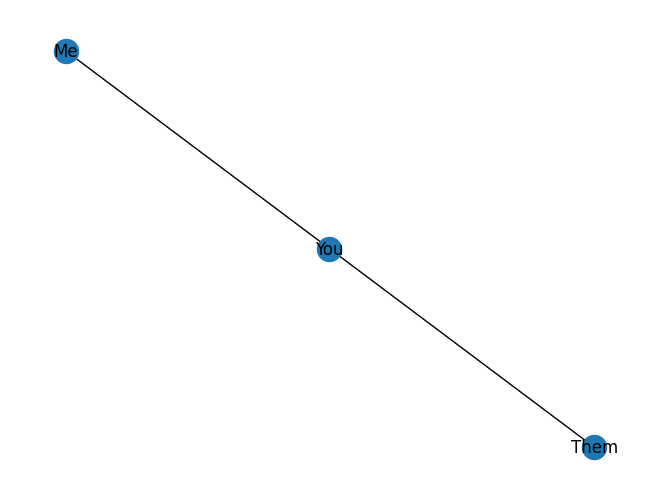

In [144]:
nx.draw(G, with_labels=True)

### Some People Data

Let's re-use what we made before:

In [10]:
%run "../Part 0 - The Data/Solution.ipynb"

Mrs.
Mx.
Miss
Dr.
Mr.
Misc.
Ms.
Ind.
😟


## The Graph

Now we're ready to define and populate the network graph. NetworkX provides helpful methods to populate the structure from an iterable. Here we massage our list of `people` a bit in order to give a unique name to each *node* in the graph:

In [146]:
G = nx.Graph() # a simple undirected graph
G.add_nodes_from(..., person=True, type="person") # give them some tags so it's easy to identify the nodes later
G.nodes(data=True) # we can look at the contents (which should be very familiar!)

NodeDataView({'Donald Richardson': {'person': True, 'type': 'person', 'name': 'Donald Richardson', 'hire_date': datetime.date(2021, 11, 21), 'status': 'Contract', 'languages': ['JavaScript'], 'manager': 'Kelsey Ramos', 'team': 'Business', 'title': 'Analyst', 'location': {'city': 'New York', 'tz': 'EST', 'country': 'USA'}, 'rank': 1.0, 'city': 'New York', 'tz': 'EST', 'country': 'USA'}, 'Stephanie Bryan': {'person': True, 'type': 'person', 'name': 'Stephanie Bryan', 'hire_date': datetime.date(2021, 10, 7), 'status': 'Full Time', 'languages': ['Python', 'Typescript', 'JavaScript'], 'manager': 'Veronica Jones', 'team': 'Business', 'title': 'Analyst', 'location': {'city': 'London', 'tz': 'UTC', 'country': 'GBR'}, 'rank': 1.0, 'city': 'London', 'tz': 'UTC', 'country': 'GBR'}, 'Janet Allison': {'person': True, 'type': 'person', 'name': 'Janet Allison', 'hire_date': datetime.date(2020, 12, 21), 'status': 'Contract', 'languages': ['Python', 'Typescript', 'JavaScript', 'Java'], 'manager': 'Jose

### Visualizing

Graphs lends themselves well to visual representations. NetworkX also makes this easy to do by tapping into Python's workhorse plotting library, `matplotlib`. We will revisit this later with a more dynamic + interactive approach to visualizing, but for the moment this is the fastest way to get things on paper

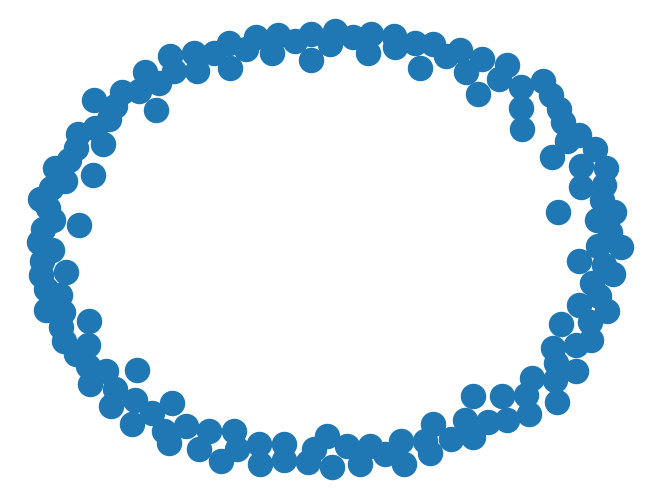

In [148]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=False)

Let's add a bit of color to this by mapping colors to the `person.team`. Pick any colorscale from `px.colors` (or make your own!). Generally the *qualitative* colors look nice, anything designed for *categorical* data 

In [149]:
colors: dict[str, str] = ...
colors

{'Business': 'rgb(229, 134, 6)',
 'DevOps': 'rgb(93, 105, 177)',
 'DevX': 'rgb(82, 188, 163)',
 'Internal Tools': 'rgb(153, 201, 69)',
 'Platform': 'rgb(204, 97, 176)',
 'Product': 'rgb(36, 121, 108)',
 'Sales': 'rgb(218, 165, 27)',
 'Support': 'rgb(47, 138, 196)',
 'CEO': 'rgb(118, 78, 159)'}

In [150]:
# here are some helpful helpers to translate colors
def rgb_to_hex(r, g, b):
    return f'#{r:02x}{g:02x}{b:02x}'
def rgb_string_to_tuple(rgb:str) -> tuple[int,int,int]:
    return tuple(int(c) for c in rgb.replace("rgb(","").replace(")","").split(","))


Now we can determine what the color should be for each node and pass that into the `nx.draw` call as a list of `node_color`. The easiest way to do this is to use `G.nodes(data=...)` for the attribute you want to extract, which will give you a map from each node to that attribute. `nx` allows you to iterate

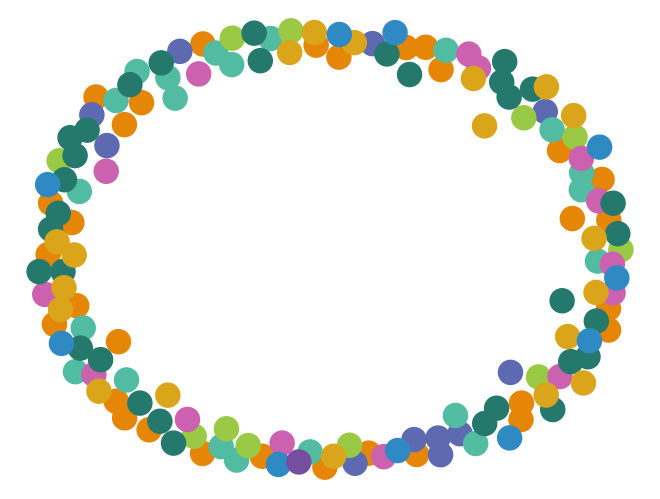

In [151]:
node_colors = [...]
nx.draw(G, node_color=node_colors)

If this doesn't make much sense yet, it's because we haven't connected any of the nodes together. Adding *edges* to the graph will give shape and meaning to the arrangement of nodes. We can do this similarly to how we added edges. Let's start by connecting nodes by the `manager` attribute.

Be sure to only add edges that reference nodes that exist

In [152]:
G.add_edges_from(..., label="manager", manager=True)

Now this should look a bit more sensible

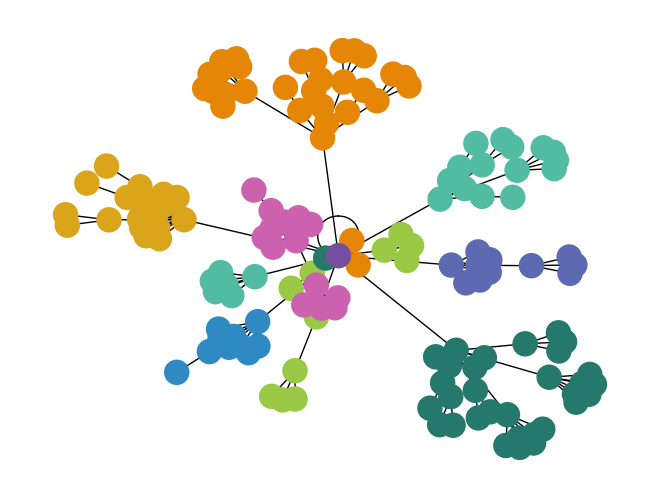

In [153]:
nx.draw(G, node_color=node_colors)

**What are 3 more tests we can do now to check this graph structure matches our statistical understanding of the tabular data?**

1. ?
2. ?
3. ?


#### Plotly

To view more details of the plot, it's useful to switch to an interactive plotting library like `plotly`. It allows us to hover over data points and inspect their attributes, unlocking more dimensions of our data for exploration. Let's start to construct a function to plot an `nx.Graph` in the style of the grammar of graphics (like in the plotly API)

In [1]:
import pandas as pd
import plotly.express as px

A quick example using Plotly and extracting attribute positions from our graph. Let's pass a `pd.DataFrame` to plotly and tell it which columns to use to construct and style the plot 

In [3]:
little_data = pd.DataFrame({"name":["Alice","Bob","Eve"], "age":[29,24,47]})
px.bar(little_data, color="name", x="name", y="age")

Now let's pull out the positions of nodes from our plot

In [13]:
positions = nx.spring_layout(G)
positions

{'Me': array([-0.66016943,  0.787665  ]),
 'You': array([0.77728772, 0.212335  ]),
 'Them': array([-0.11711829, -1.        ])}

This should be everything we need to make a scatter plot of our data!

In [155]:
import plotly.graph_objects as go
def px_plot_network_graph_nodes(G:nx.Graph, *, layout=None, **pxkwargs) -> go.Figure:
    # generate the x/y coordinates to represent the graph
    positions = (layout or nx.spring_layout(G))
    # prepare data as DataFrame for plotly
    df = pd.DataFrame(...)
    # do any extra magic to deal with missing values or weird types
    # ...
     
    # create figure, passing through the pxkwargs to define color, size, etc.
    fig = px.scatter(df, x="x", y="y", hover_data=df.columns, **pxkwargs)
    return fig


Now that the nodes are plotting, let's add edges

In [ ]:

def px_plot_nx(G:nx.Graph, *, layout=nx.spring_layout, with_edges=False, **nodekwargs) -> go.Figure:
    """Draw a graph using ``plotly``

    Kwargs are passed through to `px.scatter` and can be used to control the attributes that 
    map ``color``, ``size``, ``facet_row``, ... to attributes in the graph nodes
    
    Notes
    -----
    Rendering ``with_edges`` is expensive and should be avoided during exploratory plotting
    """
    # Generate positions, edges 
    nodes = layout(G)
    edges = [...]
    # Plot nodes using our previous function
    figure = px_plot_network_graph_nodes(G, layout=nodes, **nodekwargs)
    if with_edges: # Add edges to nodes
        figure.add_traces([
            px.line(...).data[0] for edge in edges
        ])
        figure.data = figure.data[::-1] # shuffle edges behind nodes
    return figure

Choosing different attributes for `color`, `size`, `text` and `hover_name` are helpful to explore. Make sure you use `template="plotly_dark"` if you're a dark-themer or you might burn out your eyeballs!

Note: plotting `with_edges=True` is quite expensive, try toggling it off if you find it bothersome

**Let's revisit our tests from above -- can we confirm now that people are in the right places?**

#### Pyvis

We can also use `pyvis` for a more interactive graph:

```python
from pyvis.network import Network

nt = Network('500px', '500px', notebook=True, cdn_resources="in_line", bgcolor="black")
nt.from_nx(H)
nt.show("nx.html");
```

`pyvis` will prettify your graph for you if you include attributes:
* group: is this part of a group? It will be coloured as such
* title: hover text
* label: displayed under the node

Here's another helpful plotting function:

In [ ]:
from pyvis.network import Network
def nt_show(G: nx.Graph, color:str=None, title:str=None, label:str=None, legend:bool=True, **network_kwargs):
    """Draw a graph using ``pyvis``

    Parameters
    ----------
    color: str
        the name of the attribute to color nodes by
    title:str
        the name of the attribute to generate hover data titles
    label:str
        the name of attribute to print text labels
    legend:bool
        whether to include a janky legend
    **network_kwargs
        passed through to `pyvis.network.Network` and can be used to customize how the plot is rendered

    """
    H = G.copy()
    # set the graph plotting attributes based on the values of the provided attributes 
    if color:
        nx.set_node_attributes(H, ..., "group")
    if title: 
        nx.set_node_attributes(H, ..., "title")
    if label:
        nx.set_node_attributes(H, ..., "label")
    if legend:
        add_legend_nodes(H)        
    default_kwargs = dict(notebook=True, cdn_resources="in_line")
    nt = Network(**default_kwargs|network_kwargs)
    nt.from_nx(H)
    return nt.show("nx.html");


def add_legend_nodes(G:nx.Graph):
    # Add Legend Nodes
    step = 100
    x = -500 * 2
    y = -500 * 2
    groups = set(group for _, group in G.nodes(data="group"))
    legend_nodes = [
        (
            group, 
            {
                'group': group, 
                'label': group,
                'size': 50, 
                # 'fixed': True, # So that we can move the legend nodes around to arrange them better
                'physics': False, 
                'x': f'{x}px', 
                'y': f'{y + legend_node*step}px',
                'shape': 'box', 
                'widthConstraint': step * 2, 
                'font': {'size': 30}
            }
        )
        for legend_node, group in enumerate(groups) if group
    ]
    G.add_nodes_from(legend_nodes)

**Can we make a better legend?**

**Visualize your graph and verify that:**

* The reporting structure makes sense
* The job titles are distributed as you'd expect
* The locations make sense

In [130]:
from functools import partial

layout = (
    nx.spring_layout
)  # partial(nx.spring_layout,k=0.1, iterations=20) # or customize how the layout is generated
px_plot_nx(
    G,
    ...
)

In [ ]:
nt_show(G, ...)